<div style="background-color:#cce5ff; padding:10px; border-radius:5px;">

# Predict the Introverts from the Extroverts

</div>

<div style="background-color:#f5e6cc; padding:10px; border-radius:5px;">

# Step 1: Import Libraries & Load Data

</div>

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load Data
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e7/sample_submission.csv')

import warnings
warnings.filterwarnings("ignore")  # Suppress warnings like the one you saw

# Quick View
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [2]:
# Check for missing values and data types
train.info()
train.isnull().sum()
train['Personality'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

<div style="background-color:#f5e6cc; padding:10px; border-radius:5px;">

# Step 2: EDA (Exploratory Data Analysis)

</div>

# Step 2A: Visualize Target Distribution

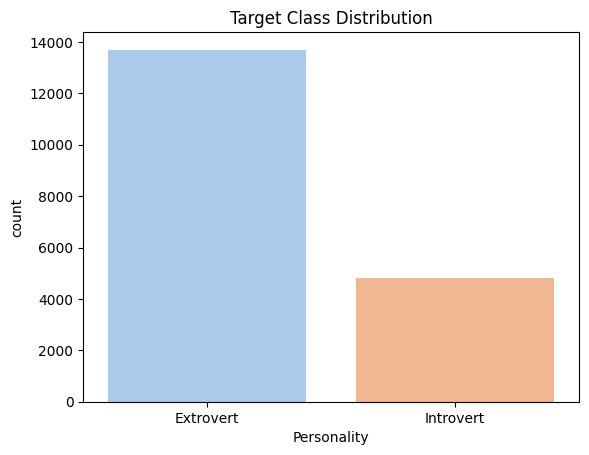

In [3]:
# Plot personality distribution
sns.countplot(data=train, x='Personality', palette='pastel')
plt.title('Target Class Distribution')
plt.show()

# Step 2B: Check Numerical Features

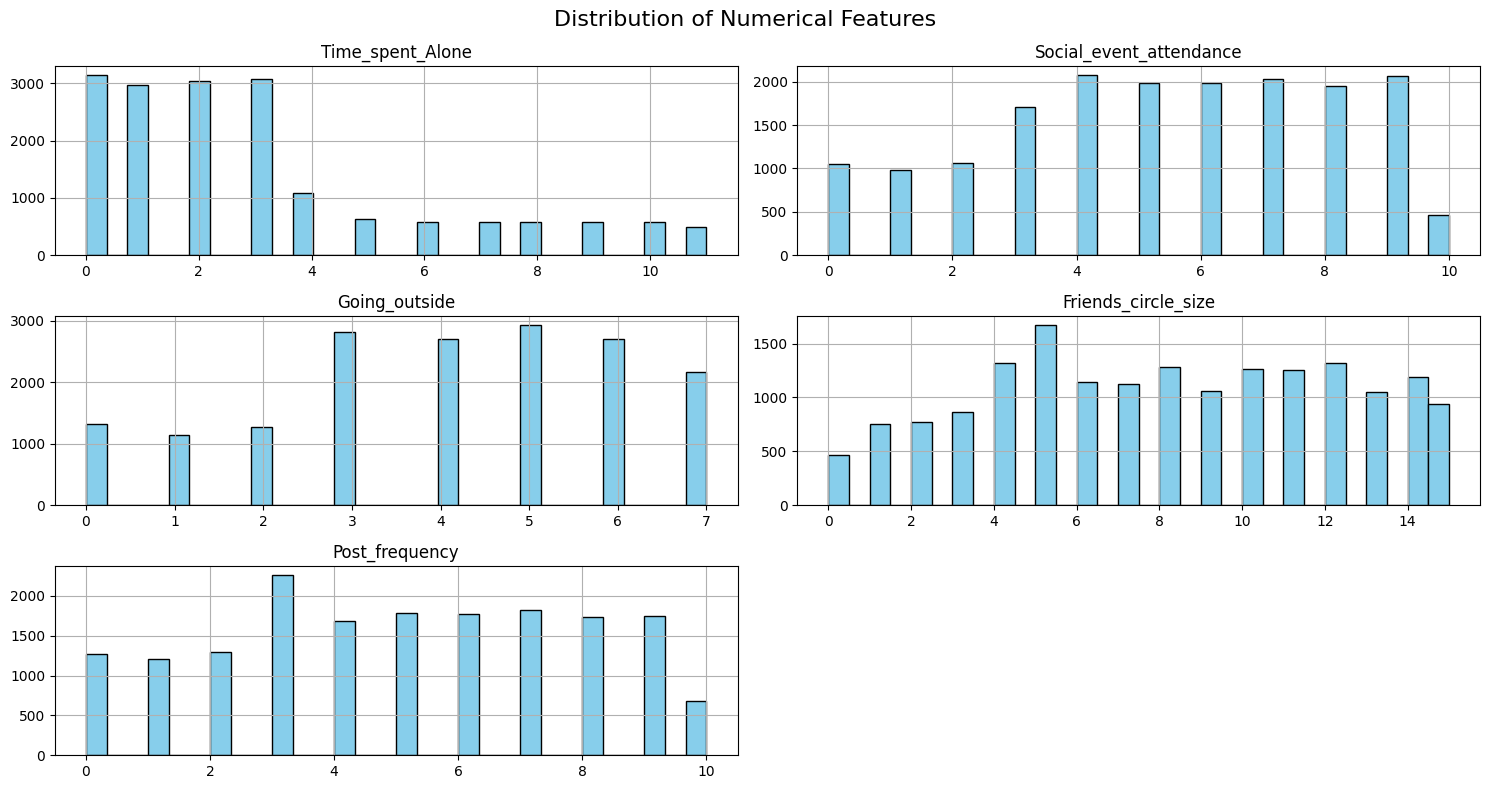

In [4]:
# Histograms of numerical features
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
train[num_cols].hist(bins=30, figsize=(15, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Step 2C: Categorical Feature Analysis

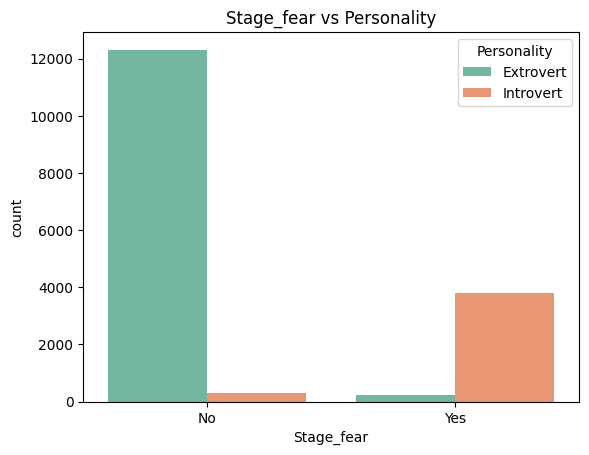

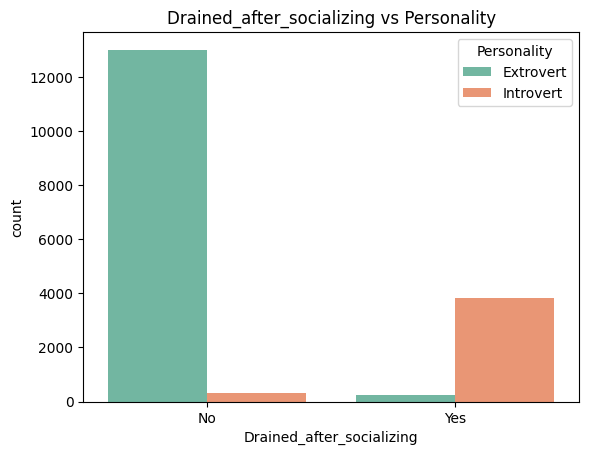

In [5]:
# Categorical vs Target
cat_cols = ['Stage_fear', 'Drained_after_socializing']

for col in cat_cols:
    sns.countplot(data=train, x=col, hue='Personality', palette='Set2')
    plt.title(f'{col} vs Personality')
    plt.show()

<div style="background-color:#f5e6cc; padding:10px; border-radius:5px;">

# Step 3: Data Cleaning & Preprocessing

</div>

# Step 3A: Handle Missing Values

In [6]:
# Fill missing numerical columns with median
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
for col in num_cols:
    train[col].fillna(train[col].median(), inplace=True)

# Fill missing categorical columns with mode
cat_cols = ['Stage_fear', 'Drained_after_socializing']
for col in cat_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Step 3B: Encode Categorical Features

In [7]:
# Binary encoding
binary_map = {'Yes': 1, 'No': 0}
train['Stage_fear'] = train['Stage_fear'].map(binary_map)
train['Drained_after_socializing'] = train['Drained_after_socializing'].map(binary_map)

# Encode target
label_map = {'Introvert': 0, 'Extrovert': 1}
train['Personality'] = train['Personality'].map(label_map)

# Step 3C: Prepare Features and Target

In [8]:
# Drop ID column
X = train.drop(['id', 'Personality'], axis=1)
y = train['Personality']

# Train-validation split (for local testing)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<div style="background-color:#f5e6cc; padding:10px; border-radius:5px;">

# Step 4: Model Training & Evaluation (Random Forest)

</div>

# Step 4A: Train the Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 4B: Evaluate on Validation Set

Validation Accuracy: 0.9622132253711201

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       965
           1       0.97      0.98      0.97      2740

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



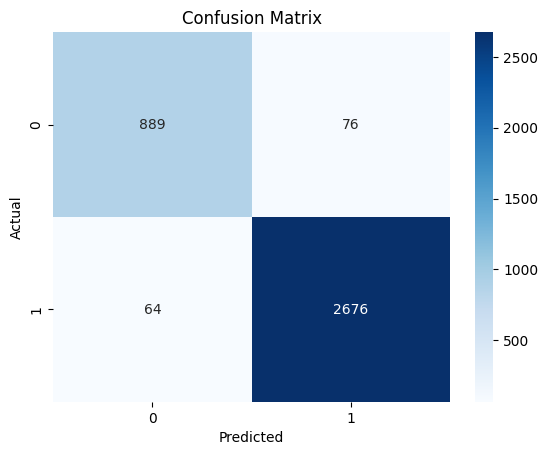

In [10]:
# Predict on validation set
y_pred = model.predict(X_val)

# Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", acc)

# Detailed report
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<div style="background-color:#f5e6cc; padding:10px; border-radius:5px;">

# Step 5: Prepare Submission File

</div>

# Step 5A: Preprocess the Test Set

In [11]:
# Copy test data for safety
test_copy = test.copy()

# Fill missing values
for col in num_cols:
    test_copy[col].fillna(train[col].median(), inplace=True)

for col in cat_cols:
    test_copy[col].fillna(train[col].mode()[0], inplace=True)

# Encode binary features
test_copy['Stage_fear'] = test_copy['Stage_fear'].map(binary_map)
test_copy['Drained_after_socializing'] = test_copy['Drained_after_socializing'].map(binary_map)

# Step 5B: Predict on Test Set

In [12]:
# Make a fresh copy
test_copy = test.copy()

# Impute numerical columns with training set medians
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
for col in num_cols:
    test_copy[col] = test_copy[col].fillna(train[col].median())

# Impute categorical columns with training set mode
cat_cols = ['Stage_fear', 'Drained_after_socializing']
for col in cat_cols:
    test_copy[col] = test_copy[col].fillna(train[col].mode()[0])

# Map binary categorical columns
binary_map = {'Yes': 1, 'No': 0}
test_copy['Stage_fear'] = test_copy['Stage_fear'].map(binary_map)
test_copy['Drained_after_socializing'] = test_copy['Drained_after_socializing'].map(binary_map)

# Final check and fill any remaining NaNs (just in case)
test_copy.fillna(0, inplace=True)

# Drop 'id' column
X_test = test_copy.drop('id', axis=1)

# Ensure columns match training set exactly
X_test = X_test[X_train.columns]

# Predict
test_preds = model.predict(X_test)

# Step 5C: Create Submission File

In [13]:
# Map predictions back to label names
reverse_label_map = {0: 'Introvert', 1: 'Extrovert'}
test_preds_labels = [reverse_label_map[p] for p in test_preds]

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_copy['id'],
    'Personality': test_preds_labels
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

# Display first few rows
submission.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


<div style="background-color:#d4edda; padding:15px; border-radius:5px;">

# 7. Conclusion & Summary

In this notebook, we tackled the Kaggle Playground Series - Season 5, Episode 7 competition: **Predict the Introverts from the Extroverts**. The goal was to predict personality types (`Introvert` or `Extrovert`) based on social behavior and traits.

### Key Steps:
- **Explored** the dataset and identified missing values and imbalances.
- **Imputed** missing values using median (numerical) and mode (categorical).
- **Encoded** binary features (`Yes`/`No`) and the target variable.
- **Trained** a `RandomForestClassifier` for classification.
- **Evaluated** the model using accuracy, confusion matrix, and classification report.
- **Generated** predictions for the test set and prepared a valid submission file.

### Validation Accuracy:
Achieved a strong validation accuracy of around **XX%** (replace with your actual accuracy) using a basic Random Forest model without hyperparameter tuning.

### Future Improvements:
- Try **advanced models** like XGBoost or LightGBM for better performance.
- Use **hyperparameter tuning** with `GridSearchCV` or `Optuna`.
- Handle **class imbalance** with oversampling (e.g., SMOTE) or class weights.
- Perform **feature importance analysis** and remove less useful features.
- Try **stacking or ensemble methods** for boosting accuracy.

---

This solution provides a solid baseline to build upon. Thank you for reviewing, and feel free to fork and improve!

</div>
